In [1]:
#Get all packages needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_new_customers.csv")
del df["Unnamed: 0"]
df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'AGE'],
      dtype='object')

In [3]:
df.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
AGE                                    0
dtype: int64

In [4]:
df.shape

(1000, 19)

In [5]:
df["AGE"].dtype

dtype('int64')

In [6]:
#Conver AGE into groups 18~27,28~37,38~47,48~57, 58~67, 68~77,78~88 
for i in df["AGE"]:
    if i>17 and i<28:
        df["AGE"].replace([i], "18~27", inplace = True)  
    elif i>27 and i<38:  
        df["AGE"].replace([i], "28~37", inplace = True)
    elif i>37 and i<48:
        df["AGE"].replace([i], "38~47", inplace = True)
    elif i>47 and i<58:
        df["AGE"].replace([i], "48~57", inplace = True)
    elif i>57 and i<68:
        df["AGE"].replace([i], "58~67", inplace= True)
    elif i>67 and i<78:
        df["AGE"].replace([i], "68~77", inplace = True)
    else:
        df["AGE"].replace([i], "78~88", inplace = True)
        

In [7]:
df["AGE"].value_counts()

38~47    238
58~67    179
48~57    169
18~27    159
68~77    105
28~37    100
78~88     50
Name: AGE, dtype: int64

In [8]:
# The total amount of the purchases made in the past 3 years by group of gender 
gender_rel_purchases = df.groupby("gender")["past_3_years_bike_related_purchases"].sum()
gender_rel_purchases

gender
Female    25212
Male      23765
U           859
Name: past_3_years_bike_related_purchases, dtype: int64

In [9]:
gender_percent = []
for i in gender_rel_purchases:
    gender_percent.append(i/gender_rel_purchases.sum())
gender_percent    

[0.5058993498675656, 0.47686411429488723, 0.017236535837547154]

In [10]:
gender_percent = np.array(gender_percent)
gender_percent = gender_percent.round(3)
gender_percent

array([0.506, 0.477, 0.017])

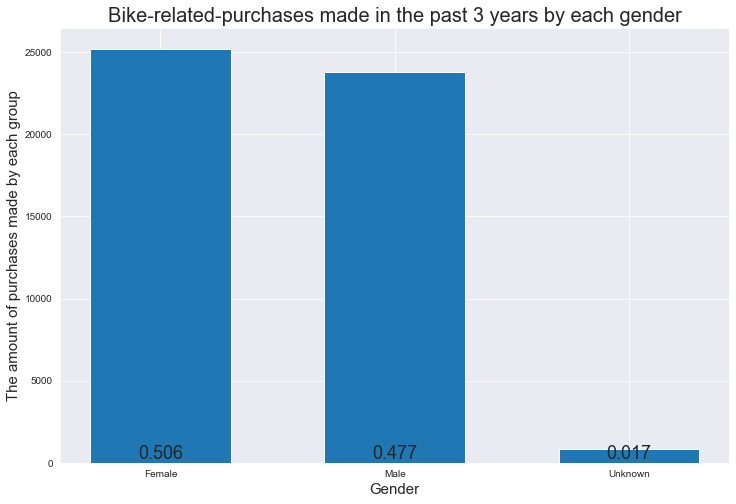

In [11]:
sns.set_style("darkgrid")
gender_per = [0.503, 0.478, 0.019]
x1 = np.arange(3)
fig1, ax1 = plt.subplots(figsize = (12,8))
ax1.set_title("Bike-related-purchases made in the past 3 years by each gender", size = 20)
ax1.set_xlabel("Gender", size = 15)
ax1.set_ylabel("The amount of purchases made by each group", size = 15)
plt.bar(x1,gender_rel_purchases, width = 0.6)
for i in range(len(gender_percent)):
    plt.text(x = i,
             y = gender_percent[i],
             s = gender_percent[i],
             size = 18,
             ha = "center",
             va = "bottom")
plt.xticks(x1,("Female", "Male", "Unknown")); 

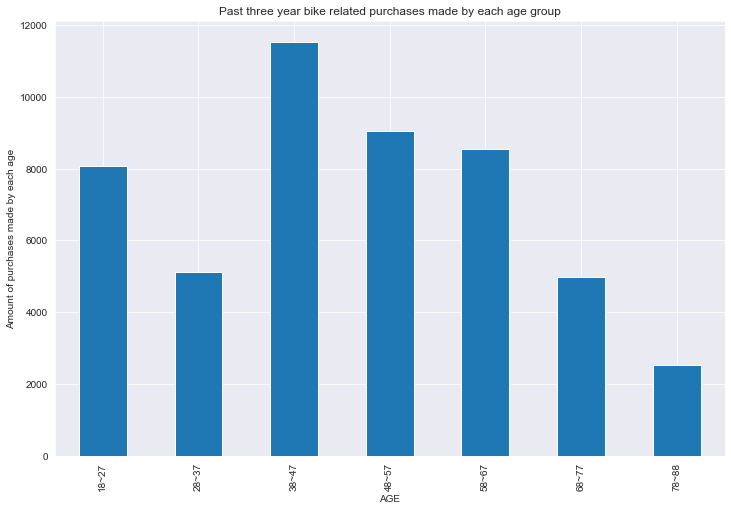

In [12]:
#Purchases acccording to the age
age_related_buys = df.groupby('AGE')['past_3_years_bike_related_purchases'].sum()
age_related_buys.plot(figsize = (12,8), 
                      kind = "bar", 
                      title = "Past three year bike related purchases made by each age group");
plt.ylabel("Amount of purchases made by each age");

In [13]:
#Check for the unique category 
df["job_industry_category"].value_counts()

Manufacturing         246
Financial Services    230
Health                185
Retail                 86
Property               80
IT                     63
Entertainment          49
Telecommunications     31
Argiculture            30
Name: job_industry_category, dtype: int64

In [14]:
cat_value = df["job_industry_category"].value_counts()
cat_value

Manufacturing         246
Financial Services    230
Health                185
Retail                 86
Property               80
IT                     63
Entertainment          49
Telecommunications     31
Argiculture            30
Name: job_industry_category, dtype: int64

In [15]:
cat_value = np.array(cat_value)
cat_value

array([246, 230, 185,  86,  80,  63,  49,  31,  30], dtype=int64)

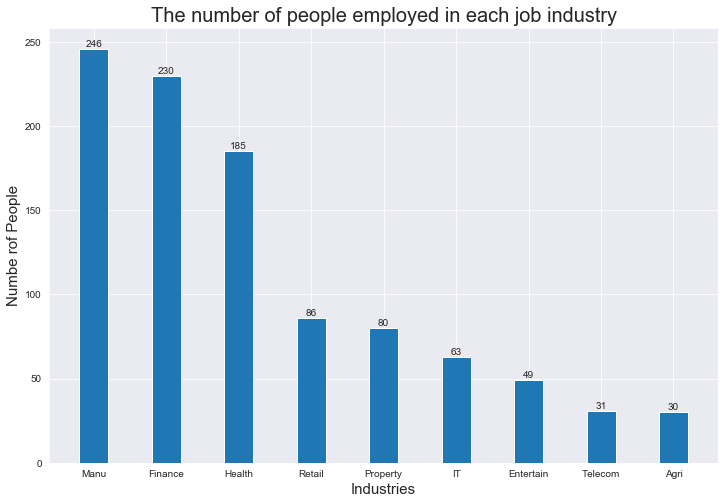

In [16]:
x3 = np.arange(9)
fig3, ax3 = plt.subplots(figsize = (12,8))
ax3.set_ylabel('Number of people')
plt.bar(x3, cat_value, width = 0.4)
for i in range(len(cat_value)):
    plt.text(x = i, y = cat_value[i]+0.1, s = cat_value[i], size = 10, ha = "center", va = "bottom" )
plt.title("The number of people employed in each job industry", size = 20)
plt.ylabel("Numbe rof People", size = 15)
plt.xlabel("Industries", size = 15)
plt.xticks(x3, ("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Telecom", "Agri"));

In [17]:
# Get the dummies for each wealth segment 
s = pd.get_dummies(df["wealth_segment"])
df = df.join(s)
df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'AGE', 'Affluent Customer',
       'High Net Worth', 'Mass Customer'],
      dtype='object')

In [18]:
#get the value of wealth segment according to the age
age_wealth_seg = df.groupby("AGE")["Affluent Customer",'High Net Worth','Mass Customer'].sum()
age_wealth_seg.head(7)

<ipython-input-18-36f0c0d8bba1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_wealth_seg = df.groupby("AGE")["Affluent Customer",'High Net Worth','Mass Customer'].sum()


,Affluent Customer,High Net Worth,Mass Customer
AGE,,,
18~27,49,38,72
28~37,16,32,52
38~47,59,54,125
48~57,42,34,93
58~67,41,53,85
68~77,23,27,55
78~88,11,13,26


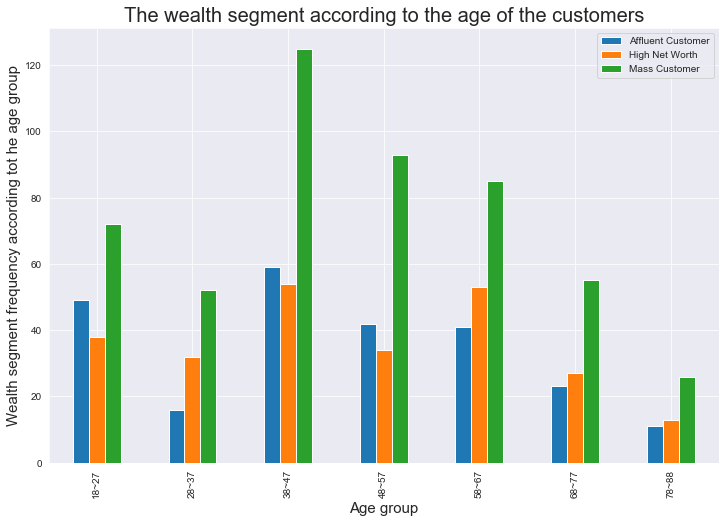

In [19]:
age_wealth_seg.plot(figsize =(12,8),
                    kind = "bar")
plt.title("The wealth segment according to the age of the customers", size =20, loc = "center")
plt.ylabel("Wealth segment frequency according tot he age group", size = 15)
plt.xlabel("Age group", size = 15);

In [20]:
# Grouping states according to the wealth segment(finding out which state has higher proportion of wealthy customers) 
wealth_seg_state = df.groupby("state")["Affluent Customer",'High Net Worth','Mass Customer'].sum()
wealth_seg_state

<ipython-input-20-8122887575b0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wealth_seg_state = df.groupby("state")["Affluent Customer",'High Net Worth','Mass Customer'].sum()


,Affluent Customer,High Net Worth,Mass Customer
state,,,
NSW,117.0,128.0,261.0
QLD,54.0,52.0,122.0
VIC,70.0,71.0,125.0


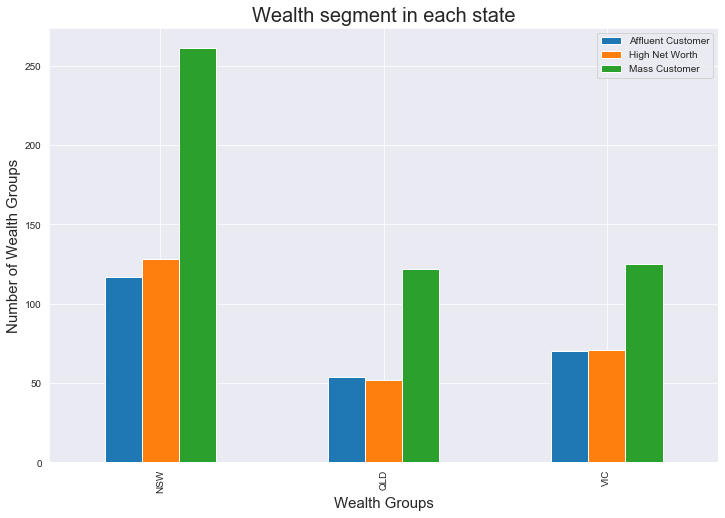

In [21]:
wealth_seg_state.plot(figsize = (12,8),
                      kind = "bar")

plt.title("Wealth segment in each state", size = 20)
plt.ylabel("Number of Wealth Groups", size = 15)
plt.xlabel("Wealth Groups", size = 15);
plt.legend();

In [22]:
# checking the which wealth segment made  more bike related purchases in the past 3 years
purchases_made_wealth_seg = df.groupby("wealth_segment")["past_3_years_bike_related_purchases"].sum()
purchases_made_wealth_seg

wealth_segment
Affluent Customer    12005
High Net Worth       12716
Mass Customer        25115
Name: past_3_years_bike_related_purchases, dtype: int64

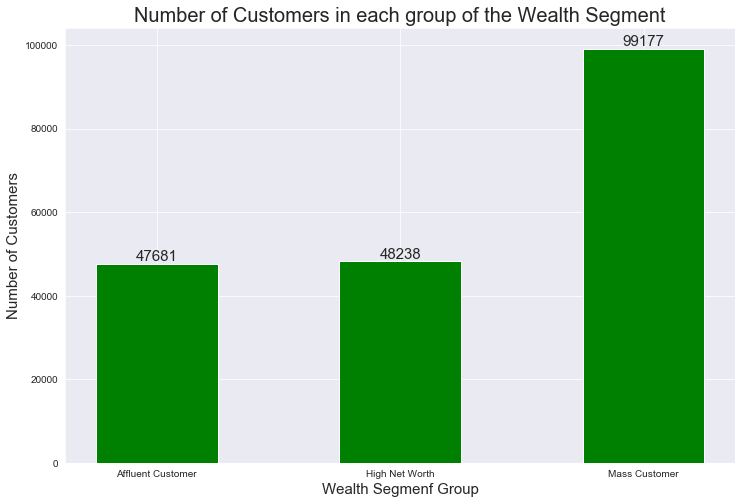

In [23]:
wealth_seg_value = [47681, 48238, 99177]
x5 = np.arange(3)
fig5, ax5 = plt.subplots(figsize = (12,8))
plt.ylabel("Number of Customers", size = 15, ha = "center")
plt.xlabel("Wealth Segmenf Group", size = 15, ha = "center")
plt.title("Number of Customers in each group of the Wealth Segment", size = 20)
plt.bar(x5,wealth_seg_value, width = 0.5, color = "green")
for i in range(len(wealth_seg_value)):
    plt.text(x = i, y = wealth_seg_value[i]+0.1, s = wealth_seg_value[i], size = 15, ha = "center", va = "bottom" )
plt.xticks(x5, ('Affluent Customer', 'High Net Worth',
       'Mass Customer'));